# Time Series Analysis PyCon 2017 by Aileen Nielsen

Covers basic techniques. Taking some notes and exploring a few things.

In [134]:
# imports
import pandas as pd
from pytz import common_timezones, all_timezones
import numpy as np
import matplotlib.pyplot as plt

## Basics

Generate a series of time stamps using `date_range`:

In [82]:
rng = pd.date_range("2020 Aug 9 17:15", periods=10, freq="M")
rng

DatetimeIndex(['2020-08-31 17:15:00', '2020-09-30 17:15:00',
               '2020-10-31 17:15:00', '2020-11-30 17:15:00',
               '2020-12-31 17:15:00', '2021-01-31 17:15:00',
               '2021-02-28 17:15:00', '2021-03-31 17:15:00',
               '2021-04-30 17:15:00', '2021-05-31 17:15:00'],
              dtype='datetime64[ns]', freq='M')

`Timestamp` uses US-style data format (`mm/dd/yyyy`):

In [83]:
pd.Timestamp("2020-08-17")

Timestamp('2020-08-17 00:00:00')

Down to nanosecond precision (even though only the first six decimal places are displayed):

In [84]:
pd.Timestamp("2020-08-17 17:15:08.156")

Timestamp('2020-08-17 17:15:08.156000')

Timestamps can tell us what quarter, day of the week, etc. they belong to:

In [85]:
ts1 = pd.Timestamp("2020-08-23 17:15:08.156")
print(f"quarter of ts1: {ts1.quarter}")
print(f"day of week of ts1: {ts1.dayofweek}")
print(f"name of day of ts1: {ts1.day_name()}")

quarter of ts1: 3
day of week of ts1: 6
name of day of ts1: Sunday


Time offsets. For example, one day and one microsecond:

In [86]:
pd.Timedelta("1 day 1us")

Timedelta('1 days 00:00:00.000001')

Add an hour and a half to a time stamp:

In [87]:
pd.Timestamp("2018-08-17 22:00") + pd.Timedelta("1.5 hours")

Timestamp('2018-08-17 23:30:00')

Time spans. Check if a time stamp is within a time period:

In [94]:
p = pd.Period("2020-08")
t = pd.Timestamp("2020-08-18")
print(f"p start time: {p.start_time}")
print(f"p end time: {p.end_time}")
print(f"period: {p}")
print(f"ts: {t}")
p.start_time < t and p.end_time > t

p start time: 2020-08-01 00:00:00
p end time: 2020-08-31 23:59:59.999999999
period: 2020-08
ts: 2020-08-18 00:00:00


True

Generate a range of time periods. Looks like a timestamp, but not its type, which is an hourly period.

In [89]:
p_rng = pd.period_range("2020-01-01 12:15", freq="H", periods=10)
p_rng

PeriodIndex(['2020-01-01 12:00', '2020-01-01 13:00', '2020-01-01 14:00',
             '2020-01-01 15:00', '2020-01-01 16:00', '2020-01-01 17:00',
             '2020-01-01 18:00', '2020-01-01 19:00', '2020-01-01 20:00',
             '2020-01-01 21:00'],
            dtype='period[H]', freq='H')

Minutely:

In [90]:
p_rng = pd.period_range("2020-01-01 12:15", freq="60T", periods=10)
p_rng

PeriodIndex(['2020-01-01 12:15', '2020-01-01 13:15', '2020-01-01 14:15',
             '2020-01-01 15:15', '2020-01-01 16:15', '2020-01-01 17:15',
             '2020-01-01 18:15', '2020-01-01 19:15', '2020-01-01 20:15',
             '2020-01-01 21:15'],
            dtype='period[60T]', freq='60T')

Check if two time stamps are within a given period range:

In [93]:
p = pd.Period("2020-08-15 12:15")
t_1 = pd.Timestamp("2020-08-15 12:25")
t_2 = pd.Timestamp("2020-08-15 12:15:33")
print(f"p.start_time: {p.start_time}")
print(f"p.end_time: {p.end_time}")
t_1_in_p = p.start_time < t_1 and p.end_time > t_1
t_2_in_p = p.start_time < t_2 and p.end_time > t_2
print(f"t_1 in p? {t_1_in_p}")
print(f"t_2 in p? {t_2_in_p}")

p.start_time: 2020-08-15 12:15:00
p.end_time: 2020-08-15 12:15:59.999999999
t_1 in p? False
t_2 in p? True


Combining offset aliases in a `date_range`:

In [95]:
pd.date_range("2020-01-01 12:15", freq="1h30min", periods=10)

DatetimeIndex(['2020-01-01 12:15:00', '2020-01-01 13:45:00',
               '2020-01-01 15:15:00', '2020-01-01 16:45:00',
               '2020-01-01 18:15:00', '2020-01-01 19:45:00',
               '2020-01-01 21:15:00', '2020-01-01 22:45:00',
               '2020-01-02 00:15:00', '2020-01-02 01:45:00'],
              dtype='datetime64[ns]', freq='90T')

Create a `Series` indexed by time periods:

In [96]:
num_periods = 10
ts_pd = pd.Series(range(num_periods), pd.period_range("2020-08-01 11:15", freq="60T", periods=num_periods))
ts_pd

2020-08-01 11:15    0
2020-08-01 12:15    1
2020-08-01 13:15    2
2020-08-01 14:15    3
2020-08-01 15:15    4
2020-08-01 16:15    5
2020-08-01 17:15    6
2020-08-01 18:15    7
2020-08-01 19:15    8
2020-08-01 20:15    9
Freq: 60T, dtype: int64

You can then slice the `Series`:

In [97]:
ts_pd["2020-08-01 13":"2020-08-01 17"]

2020-08-01 13:15    2
2020-08-01 14:15    3
2020-08-01 15:15    4
2020-08-01 16:15    5
2020-08-01 17:15    6
Freq: 60T, dtype: int64

A `Series` of indexed by time stamps:

In [98]:
num_periods = 10
ts_dt = pd.Series(range(num_periods), pd.date_range("2020-08-01 11:15", freq="60T", periods=num_periods))
ts_dt

2020-08-01 11:15:00    0
2020-08-01 12:15:00    1
2020-08-01 13:15:00    2
2020-08-01 14:15:00    3
2020-08-01 15:15:00    4
2020-08-01 16:15:00    5
2020-08-01 17:15:00    6
2020-08-01 18:15:00    7
2020-08-01 19:15:00    8
2020-08-01 20:15:00    9
Freq: 60T, dtype: int64

In [99]:
ts_dt["2020-08-01 13":"2020-08-01 17"]

2020-08-01 13:15:00    2
2020-08-01 14:15:00    3
2020-08-01 15:15:00    4
2020-08-01 16:15:00    5
2020-08-01 17:15:00    6
Freq: 60T, dtype: int64

How do you decide whether to use a `date_range` or a `period_range`? "I counted $n$ visitors to my site at time $x$ versus I counted $n$ visitors to my site during time period $x$". I counted at this time and a minute later and again another minute later or I counted all visitors during this month.

You can convert between a `DateTimeIndex` and a `PeriodIndex` using:
```python
ts_dt.to_period()
ts_pd.to_timestamp()
```

## Time zones

Can use `pytz` to get pretty good time zone support, including awareness of DST changes and a fairly up-to-date IANA tz db (at least on Linux and mac OS) and there is also [PEP 615](https://www.python.org/dev/peps/pep-0615/).

List of supported time zones:

In [100]:
print(len(all_timezones))

592


In [101]:
print(all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

By default, Pandas time objects are not time zone aware:

In [102]:
rng = pd.date_range("2020-08-15 00:00", periods=15, freq="d")
rng

DatetimeIndex(['2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28', '2020-08-29'],
              dtype='datetime64[ns]', freq='D')

In [103]:
print(rng.tz)

None


In [104]:
rng = pd.date_range("2020-08-15 00:00", periods=15, freq="d", tz="Europe/London")
rng

DatetimeIndex(['2020-08-15 00:00:00+01:00', '2020-08-16 00:00:00+01:00',
               '2020-08-17 00:00:00+01:00', '2020-08-18 00:00:00+01:00',
               '2020-08-19 00:00:00+01:00', '2020-08-20 00:00:00+01:00',
               '2020-08-21 00:00:00+01:00', '2020-08-22 00:00:00+01:00',
               '2020-08-23 00:00:00+01:00', '2020-08-24 00:00:00+01:00',
               '2020-08-25 00:00:00+01:00', '2020-08-26 00:00:00+01:00',
               '2020-08-27 00:00:00+01:00', '2020-08-28 00:00:00+01:00',
               '2020-08-29 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

In [105]:
print(rng.tz)

Europe/London


Convert a time zone naive date-time index to a time zone aware one using `Series.tz_localize()`. There is a matching method on `Timestamp`.

In [106]:
rng_naive = pd.date_range("2020-08-15 00:00", periods=15, freq="d")
rng_aware = rng_naive.tz_localize(tz="Europe/Berlin")
rng_aware

DatetimeIndex(['2020-08-15 00:00:00+02:00', '2020-08-16 00:00:00+02:00',
               '2020-08-17 00:00:00+02:00', '2020-08-18 00:00:00+02:00',
               '2020-08-19 00:00:00+02:00', '2020-08-20 00:00:00+02:00',
               '2020-08-21 00:00:00+02:00', '2020-08-22 00:00:00+02:00',
               '2020-08-23 00:00:00+02:00', '2020-08-24 00:00:00+02:00',
               '2020-08-25 00:00:00+02:00', '2020-08-26 00:00:00+02:00',
               '2020-08-27 00:00:00+02:00', '2020-08-28 00:00:00+02:00',
               '2020-08-29 00:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='D')

If an object already has a time zone associated with it, you can change it using `tz_convert()`:

In [107]:
rng_aware_ny = rng_aware.tz_convert("America/New_York")
rng_aware_ny

DatetimeIndex(['2020-08-14 18:00:00-04:00', '2020-08-15 18:00:00-04:00',
               '2020-08-16 18:00:00-04:00', '2020-08-17 18:00:00-04:00',
               '2020-08-18 18:00:00-04:00', '2020-08-19 18:00:00-04:00',
               '2020-08-20 18:00:00-04:00', '2020-08-21 18:00:00-04:00',
               '2020-08-22 18:00:00-04:00', '2020-08-23 18:00:00-04:00',
               '2020-08-24 18:00:00-04:00', '2020-08-25 18:00:00-04:00',
               '2020-08-26 18:00:00-04:00', '2020-08-27 18:00:00-04:00',
               '2020-08-28 18:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

Takes care of DST changes:

In [108]:
rng = pd.date_range("2020-03-05", periods=10, tz="US/Eastern")
ts = pd.Series(range(10), index=rng)
ts

2020-03-05 00:00:00-05:00    0
2020-03-06 00:00:00-05:00    1
2020-03-07 00:00:00-05:00    2
2020-03-08 00:00:00-05:00    3
2020-03-09 00:00:00-04:00    4
2020-03-10 00:00:00-04:00    5
2020-03-11 00:00:00-04:00    6
2020-03-12 00:00:00-04:00    7
2020-03-13 00:00:00-04:00    8
2020-03-14 00:00:00-04:00    9
Freq: D, dtype: int64

If you do not work in UTC, you might get ambiguous times. This can happen when you track time stamps across a DST change boundary (e.g., the clock falls back by an hour in the time zone and therefore, that time is followed by the same time). For example:

In [109]:
rng_hourly = pd.DatetimeIndex(data=["2011-11-06 00:00", "2011-11-06 01:00", "2011-11-06 01:00", "2011-11-06 02:00"])
rng_hourly

DatetimeIndex(['2011-11-06 00:00:00', '2011-11-06 01:00:00',
               '2011-11-06 01:00:00', '2011-11-06 02:00:00'],
              dtype='datetime64[ns]', freq=None)

In [110]:
rng_hourly.tz_localize("US/Central")

AmbiguousTimeError: Cannot infer dst time from %r, try using the 'ambiguous' argument

We can handle this error by letting Pandas infer how to handle the ambiguous time:

In [111]:
rng_hourly.tz_localize("US/Central", ambiguous="infer")

DatetimeIndex(['2011-11-06 00:00:00-05:00', '2011-11-06 01:00:00-05:00',
               '2011-11-06 01:00:00-06:00', '2011-11-06 02:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', freq=None)

Best to work in UTC whenever possible:

In [112]:
rng_hourly.tz_localize("US/Central", ambiguous="infer").tz_convert("utc")

DatetimeIndex(['2011-11-06 05:00:00+00:00', '2011-11-06 06:00:00+00:00',
               '2011-11-06 07:00:00+00:00', '2011-11-06 08:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Resampling

In [113]:
rng = pd.date_range("2011-01-01", periods=72, freq="H")
#print(len(rng))
#print(range(len(rng)))
#print(list(range(len(rng))))
ts = pd.Series(list(range(len(rng))), index=rng)

In [114]:
ts.head()

2011-01-01 00:00:00    0
2011-01-01 01:00:00    1
2011-01-01 02:00:00    2
2011-01-01 03:00:00    3
2011-01-01 04:00:00    4
Freq: H, dtype: int64

In [74]:

converted_ffill = ts.asfreq("45min", method="ffill")

In [115]:
converted_ffill.head()

2011-01-01 00:00:00    0
2011-01-01 00:45:00    0
2011-01-01 01:30:00    1
2011-01-01 02:15:00    2
2011-01-01 03:00:00    3
Freq: 45T, dtype: int64

In [116]:
converted_bfill = ts.asfreq("45min", method="bfill")

In [117]:
converted_bfill.head()

2011-01-01 00:00:00    0
2011-01-01 00:45:00    1
2011-01-01 01:30:00    2
2011-01-01 02:15:00    3
2011-01-01 03:00:00    3
Freq: 45T, dtype: int64

In [118]:
converted = ts.asfreq("45min")

In [119]:
converted.head()

2011-01-01 00:00:00    0.0
2011-01-01 00:45:00    NaN
2011-01-01 01:30:00    NaN
2011-01-01 02:15:00    NaN
2011-01-01 03:00:00    3.0
Freq: 45T, dtype: float64

The `resample` method is much more powerful than `asfreq`:

In [121]:
ts.resample??

Signature:
ts.resample(
    rule,
    how=None,
    axis=0,
    fill_method=None,
    closed=None,
    label=None,
    convention='start',
    kind=None,
    loffset=None,
    limit=None,
    base=0,
    on=None,
    level=None,
)
Source:   
    def resample(
        self,
        rule,
        how=None,
        axis=0,
        fill_method=None,
        closed=None,
        label=None,
        convention="start",
        kind=None,
        loffset=None,
        limit=None,
        base=0,
        on=None,
        level=None,
    ):
        """
        Resample time-series data.

        Convenience method for frequency conversion and resampling of time
        series. Object must have a datetime-like index (`DatetimeIndex`,
        `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
        to the `on` or `level` keyword.

        Parameters
        ----------
        rule : DateOffset, Timedelta or str
            The offset string or object representing target conversio

Your time series data can be sampled at irregular intervals, but it needs to be in sorted order for Pandas to be able to resample it.

## Lag and Moving Window Functions 

You can `lag` a time series so as to move the entire time series forward or backward by some time unit. This can be useful to compare time series visually with each other. 

You can apply window functions (e.g., rolling window, expanding window) to smooth the information in your time series. The window moves over the data a few data points at a time and somehow aggregates the data points contained in each window.

### Lag

'Difference' a time series inspecting its lagged representation:

In [128]:
ts = pd.Series(np.random.randn(20) + 10, pd.date_range("2020-07-01", freq="D", periods=20))
ts_lagged = ts.shift()  # will shift all values by one index and lose the last value

In [129]:
ts.head()

2020-07-01    10.228611
2020-07-02     9.077057
2020-07-03    11.296964
2020-07-04    10.427316
2020-07-05     8.655188
Freq: D, dtype: float64

In [130]:
ts_lagged.head()

2020-07-01          NaN
2020-07-02    10.228611
2020-07-03     9.077057
2020-07-04    11.296964
2020-07-05    10.427316
Freq: D, dtype: float64

In [127]:
ts.diff()

2020-07-01         NaN
2020-07-02   -0.700547
2020-07-03   -1.372591
2020-07-04    0.365105
2020-07-05   -0.104153
2020-07-06    0.805093
2020-07-07   -0.744387
2020-07-08   -0.342796
2020-07-09    0.639711
2020-07-10    0.393113
2020-07-11    0.289518
2020-07-12   -1.186148
2020-07-13    1.770268
2020-07-14   -0.438972
2020-07-15    0.804563
2020-07-16   -1.003637
2020-07-17   -1.136828
2020-07-18    2.123310
2020-07-19   -1.448656
2020-07-20    1.148052
Freq: D, dtype: float64

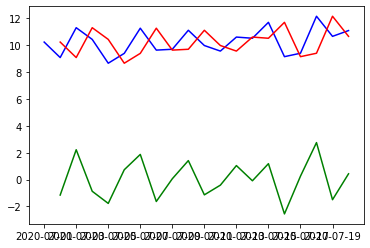

In [135]:
plt.plot(ts, color="blue")
plt.plot(ts_lagged, color="red")
plt.plot(ts - ts_lagged, color="green")

Can also use `ts.diff` in order to compute the difference:

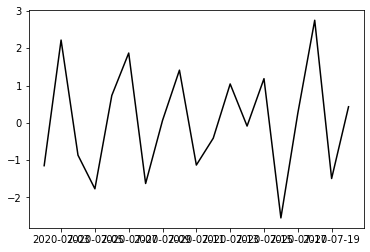

In [136]:
plt.plot(ts.diff(), color="black")

### Window Functions

In [141]:
df = pd.DataFrame(np.random.randn(600, 3), index=pd.date_range("2016-05-01", freq="D", periods=600))

In [142]:
df.head()

,0,1,2
2016-05-01,0.674741,0.166550,0.012977
2016-05-02,1.854135,-1.104381,0.801012
2016-05-03,0.843335,0.582054,1.700816
2016-05-04,0.136348,0.087335,-1.050419
2016-05-05,-0.985102,-0.126982,-0.555523


This defines a rolling window that you can use to apply operation on.

In [144]:
r = df.rolling(window=20)
r

Rolling [window=20,center=False,axis=0]

Take 20 data points and compute the mean:

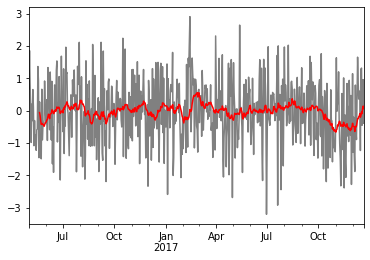

In [147]:
df[0].plot(color="gray")
r.mean()[0].plot(color="red")

Works in the same way for other functions:

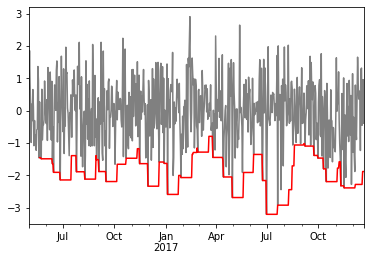

In [148]:
df[0].plot(color="gray")
r.min()[0].plot(color="red")

The bigger you make your window (in terms of data points / observations), the smoother the resulting function will become:

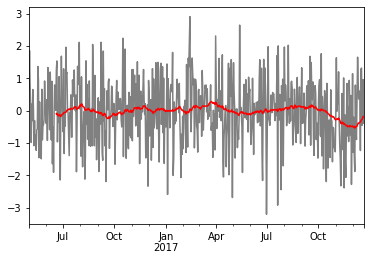

In [151]:
r2 = df.rolling(window=50)
df[0].plot(color="gray")
r2.mean()[0].plot(color="red")

There are many other operations you can call on a rolling window, such as `r.agg`, `r.apply`, `r.count`, `r.max`, `r.median`, `r.name`, `r.quantile`, `r.kurt`, `r.aggregate`, `r.std`, `r.skew`, `r.sum`, `r.var`.

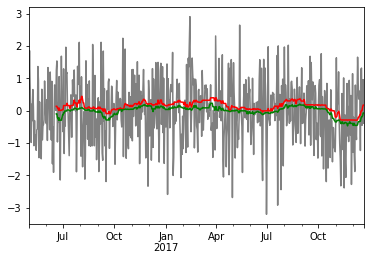

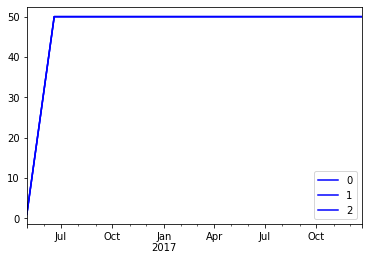

In [163]:
df[0].plot(color="gray")
r2.quantile(0.57)[0].plot(color="red")
r2.median()[0].plot(color="green")
r2.count().plot(color="blue")

Applying a custom function to a rolling window:

In [178]:
df.rolling(window=10, center=False).apply(lambda x: x[1]/x[2])[10:20]

,0,1,2
2016-05-11,6.185148,6.664628,-1.619179
2016-05-12,-0.138410,-0.687774,1.890863
2016-05-13,-4.938554,-0.089636,0.284223
2016-05-14,-0.639987,0.971675,1.094969
2016-05-15,-0.479200,5.709751,2.061801
2016-05-16,7.742696,0.223571,-1.389380
2016-05-17,-0.077392,2.336266,-0.615035
2016-05-18,3.518086,0.579549,-0.487240
2016-05-19,0.330089,0.531926,2.607998
2016-05-20,1.252480,-1.100403,1.311516


#### Exponentially Weighted Moving Average

Control how fast older data points 'decay' or how much weight you give to recent data points.

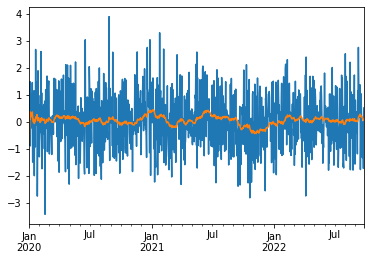

In [187]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range(start="2020-01-01", periods=1000, freq="D"))
ts.plot()
ts.ewm(span=60, min_periods=0, adjust=True).mean().plot()

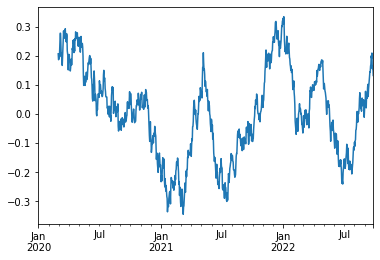

In [185]:
ts.rolling(window=60).mean().plot()

## Self-Correlation, Self-Explanation and Self-Prediction

### Autocorrelation Function

Used to help identify possible structures in time series data. Helps to find structure in what may seem like chaos to the naked eye. Gives a sense of how different points in time relate to each other in a way explained by temporal distance. You process data point by data point and compute how strongly it correlates with the data point behind it. So the first data point should have a correlation of 1 (as it correlates maximally with itself). You can also look at different lags (day 2 to day 3 and day 2 to day 4, day 3 to day 4 and day 3 to day 5, and so on). 

Note that correlations can occur repeatedly. For example, a phenomenon that occurs every Monday will have strong auto-correlation at seven days and at 14 days and at 21 days and so on. A partial autocorrelation function will only consider the shorter interval and not recycle the same autocorrelation repeatedly.

## Topics without notes

Some topics I did not take notes on.

### Read and handle temporal data from files

Handling reading of data from files with dates. You can tell Pandas which columns in your file (or the resulting `DataFrame`) contain date information and ask it to infer the dates for you. This then allows you to invoke methods on the `DateTimeIndex`. Can be quite convenient. However, if I remember correctly, if you let Pandas infer date formats without specifying a format string, this can become an expensive operation. According to the presentation, sometimes, letting Pandas infer dates may be faster. Need to always test this on the data at hand.

In case of monthly (or any other interval data), you may want to convert the time stamps into periods using `to_period()`.

A useful method I was not aware of is `truncate()`. For example, to remove certain rows from a date-time-indexed `DataFrame`: `ts.truncate(before="2016-10-31", after="2016-12-31")`.